In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
births = pd.read_csv("births.csv")

# Print the first few rows of the DataFrame
print(births.head())

# Fill missing values in the 'day' column with 0
births['day'].fillna(0, inplace=True)

# Convert the 'day' column to integers
births['day'] = births['day'].astype(int)


   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [2]:
import pandas as pd

# Assuming you've already imported pandas and loaded the 'births' DataFrame

# Add a new column 'decade' representing the decade corresponding to each birth year
births['decade'] = 10 * (births['year'] // 10)

# Create a pivot table to aggregate the total number of births by decade and gender
pivot_table = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

# Print the pivot table
print(pivot_table)

# Optionally, you can print the head of the 'births' DataFrame to verify the addition of the 'decade' column
print(births.head())


gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428
   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


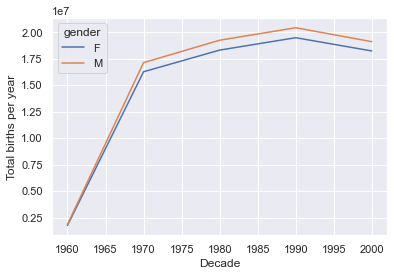

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Assuming you've already imported pandas and created the 'births' DataFrame

sns.set() 

# Create a pivot table to aggregate the total number of births by decade and gender
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 

# Plot the pivot table
birth_decade.plot() 

# Add labels to the axes
plt.xlabel("Decade")
plt.ylabel("Total births per year") 

# Show the plot
plt.show()


In [4]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [5]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

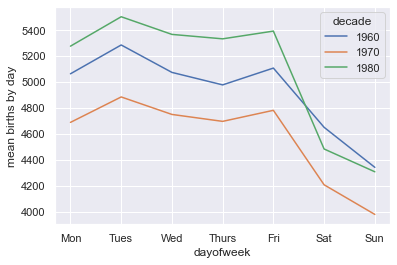

In [6]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()

# Set the x-axis tick positions and labels to match the days of the week
plt.gca().set_xticks(range(7))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

plt.ylabel('mean births by day')
plt.show()


In [7]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

# Convert the index to datetime objects
births_month.index = [pd.Timestamp(2012, month, day) for (month, day) in births_month.index]
print(births_month.head())


       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


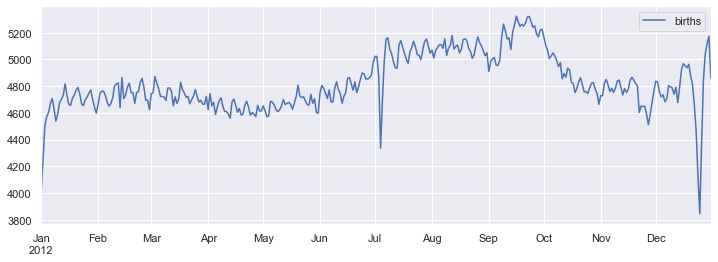

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()